# Génération d'une Série Temporelle

Ce notebook génère une série temporelle avec les composantes suivantes :
- Tendance linéaire (ordonnée à l'origine: 100, pente: 2)
- Saisonnalité sinusoïdale (amplitude: 20, période: 12 mois)
- Bruit gaussien (écart-type: 5)

Sur une période de 5 ans avec des données mensuelles.

## 1. Import des bibliothèques nécessaires

In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour la reproductibilité et le style
np.random.seed(42)
sns.set_style("whitegrid")  # On utilise directement le style de seaborn

## 2. Définition des paramètres et création de l'index temporel

In [6]:
# Paramètres
intercept = 100  # Ordonnée à l'origine
slope = 2       # Pente
amplitude = 20  # Amplitude de la saisonnalité
period = 12    # Période (en mois)
sigma = 5      # Écart-type du bruit
years = 5      # Nombre d'années

# Calcul du nombre total de points
N = years * 12

# Création de l'index temporel
date_rng = pd.date_range(start='2020-01-01', periods=N, freq='M')
t = np.arange(N)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32864\2123323929.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2020-01-01', periods=N, freq='M')


## 3. Génération des composantes

In [7]:
# Tendance
trend = intercept + slope * t

# Saisonnalité
seasonality = amplitude * np.sin(2 * np.pi * t / period)

# Bruit gaussien
noise = np.random.normal(0, sigma, N)

# Combinaison des composantes
y = trend + seasonality + noise

# Création du DataFrame
df = pd.DataFrame({
    'date': date_rng,
    'valeur': y,
    'tendance': trend,
    'saisonnalite': seasonality,
    'bruit': noise
})
df.set_index('date', inplace=True)

print("Aperçu des données :")
print(df.head())

Aperçu des données :
                valeur  tendance  saisonnalite     bruit
date                                                    
2020-01-31  102.483571       100      0.000000  2.483571
2020-02-29  111.308678       102     10.000000 -0.691322
2020-03-31  124.558951       104     17.320508  3.238443
2020-04-30  133.615149       106     20.000000  7.615149
2020-05-31  124.149741       108     17.320508 -1.170767


## 4. Visualisation des composantes

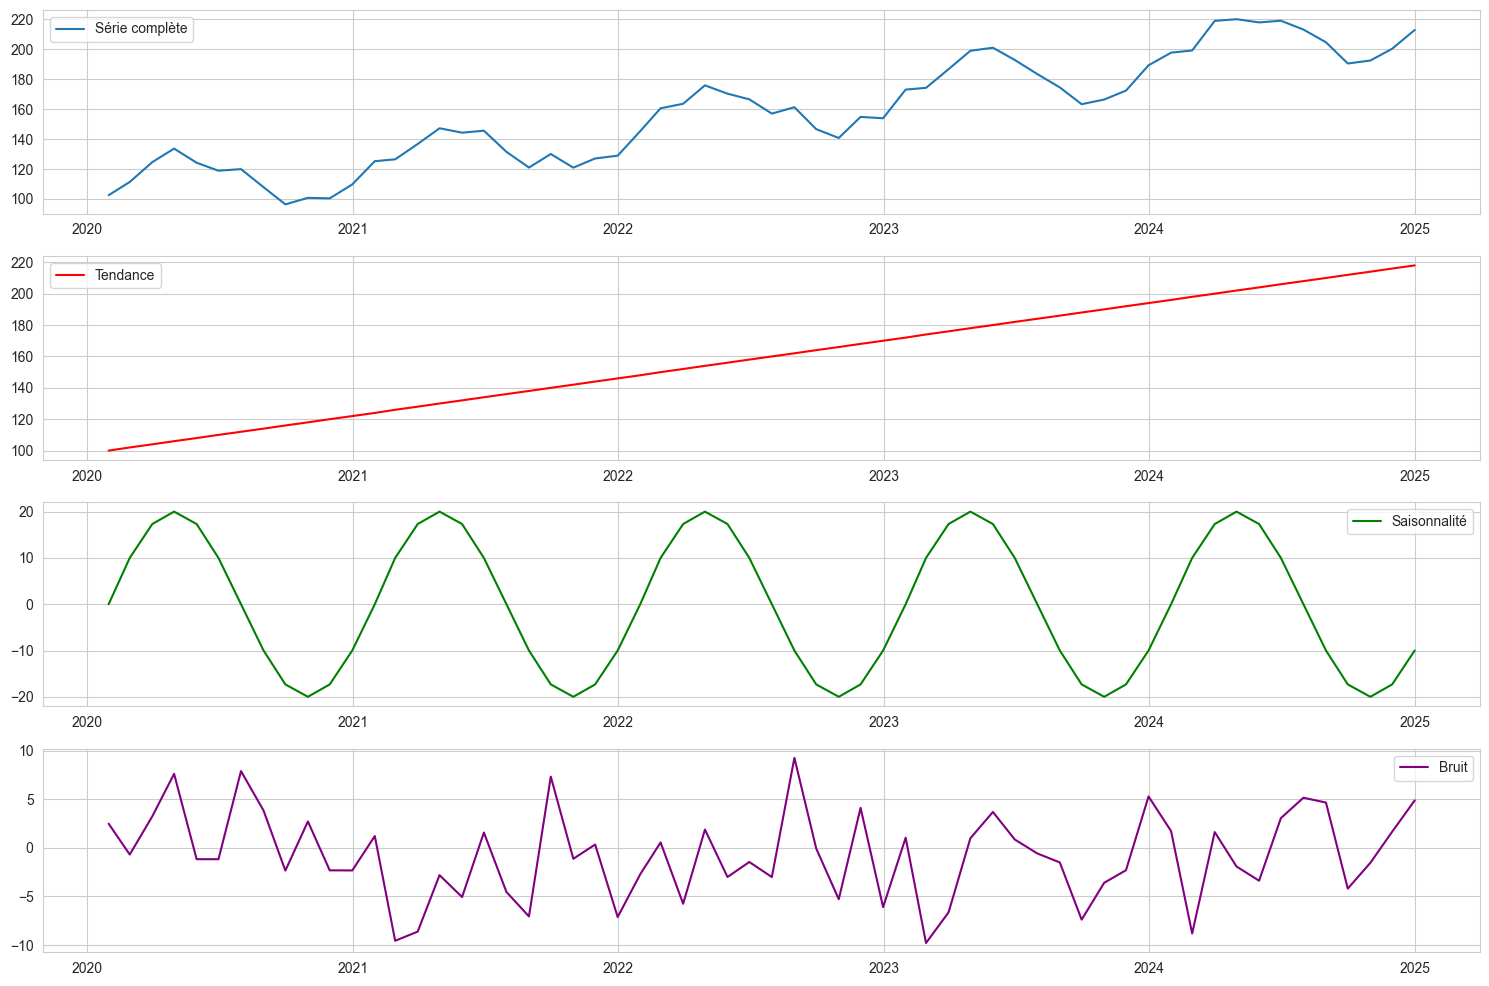

In [8]:
# Configuration de la figure
plt.figure(figsize=(15, 10))

# Création des sous-graphiques
plt.subplot(411)
plt.plot(df.index, df['valeur'], label='Série complète')
plt.legend()
plt.grid(True)

plt.subplot(412)
plt.plot(df.index, df['tendance'], label='Tendance', color='red')
plt.legend()
plt.grid(True)

plt.subplot(413)
plt.plot(df.index, df['saisonnalite'], label='Saisonnalité', color='green')
plt.legend()
plt.grid(True)

plt.subplot(414)
plt.plot(df.index, df['bruit'], label='Bruit', color='purple')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 5. Sauvegarde des données

In [9]:
# Sauvegarde du DataFrame en CSV
df.to_csv('serie_temporelle.csv')

# Statistiques descriptives
print("\nStatistiques descriptives de la série :")
print(df['valeur'].describe())

# Vérification des paramètres
print("\nVérification des paramètres :")
print(f"Écart-type du bruit (attendu ≈ {sigma}): {df['bruit'].std():.2f}")
print(f"Amplitude de la saisonnalité (attendu ≈ {amplitude}): {(df['saisonnalite'].max() - df['saisonnalite'].min())/2:.2f}")
print(f"Pente moyenne de la tendance (attendu ≈ {slope}): {(df['tendance'].iloc[-1] - df['tendance'].iloc[0])/N:.2f}")


Statistiques descriptives de la série :
count     60.000000
mean     158.226727
std       35.723176
min       96.332120
25%      126.871249
50%      158.773040
75%      189.585059
max      220.074589
Name: valeur, dtype: float64

Vérification des paramètres :
Écart-type du bruit (attendu ≈ 5): 4.54
Amplitude de la saisonnalité (attendu ≈ 20): 20.00
Pente moyenne de la tendance (attendu ≈ 2): 1.97


## 6. Tests statistiques et analyse de la série temporelle

### 6.1 Test de stationnarité (Augmented Dickey-Fuller)

In [11]:
!pip install statsmodels


  Using cached statsmodels-0.14.5-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
Using cached statsmodels-0.14.5-cp311-cp311-win_amd64.whl (9.6 MB)
   ---------------------------------------- 0.0/233.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/233.3 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/233.3 kB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 174.1/233.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 233.3/233.3 kB 1.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series):
    # Test ADF
    result = adfuller(series)
    
    # Affichage des résultats
    print('Résultats du test Augmented Dickey-Fuller :')
    print(f'Statistique de test : {result[0]:.4f}')
    print(f'p-value : {result[1]:.4f}')
    print('Valeurs critiques :')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

In [13]:
# Test de stationnarité sur la série originale
print("Test de stationnarité sur la série originale :")
test_stationarity(df['valeur'])

# Test sur la série différenciée (pour enlever la tendance)
print("\nTest de stationnarité sur la série différenciée :")
test_stationarity(df['valeur'].diff().dropna())

Test de stationnarité sur la série originale :
Résultats du test Augmented Dickey-Fuller :
Statistique de test : 1.1901
p-value : 0.9959
Valeurs critiques :
	1%: -3.5715
	5%: -2.9226
	10%: -2.5993

Test de stationnarité sur la série différenciée :
Résultats du test Augmented Dickey-Fuller :
Statistique de test : -7.4916
p-value : 0.0000
Valeurs critiques :
	1%: -3.5715
	5%: -2.9226
	10%: -2.5993


### 6.2 Analyse des fonctions d'autocorrélation (ACF et PACF)

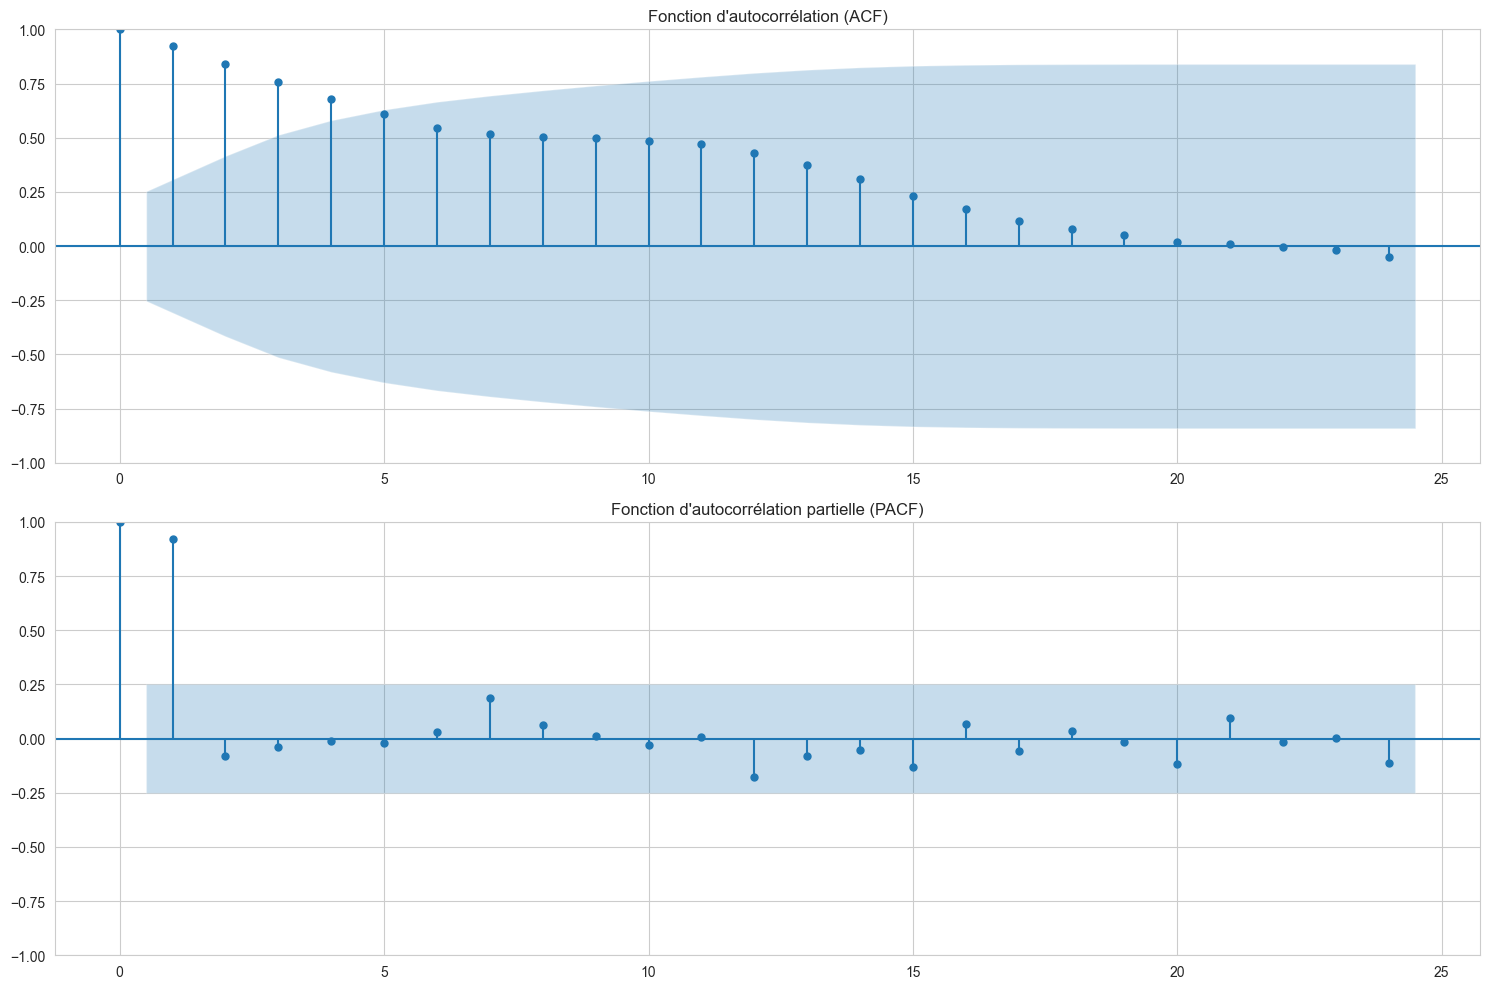

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Création d'une figure avec 2 sous-graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Tracé de l'ACF
plot_acf(df['valeur'], lags=24, ax=ax1, title='Fonction d\'autocorrélation (ACF)')
ax1.grid(True)

# Tracé de la PACF
plot_pacf(df['valeur'], lags=24, ax=ax2, title='Fonction d\'autocorrélation partielle (PACF)')
ax2.grid(True)

plt.tight_layout()
plt.show()

### 6.3 Modélisation SARIMA

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Définition du modèle SARIMA
# (1,1,1) pour la partie non saisonnière (différenciation d'ordre 1)
# (1,1,1,12) pour la partie saisonnière (période=12)
model = SARIMAX(df['valeur'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))

# Ajustement du modèle
results = model.fit()

# Affichage du résumé
print(results.summary())

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                             valeur   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -148.694
Date:                            Mon, 27 Oct 2025   AIC                            307.388
Time:                                    17:13:56   BIC                            316.639
Sample:                                01-31-2020   HQIC                           310.869
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0350      0.264     -0.133      0.895      -0.552       0.482
ma.L1         -0.8402      0.168   

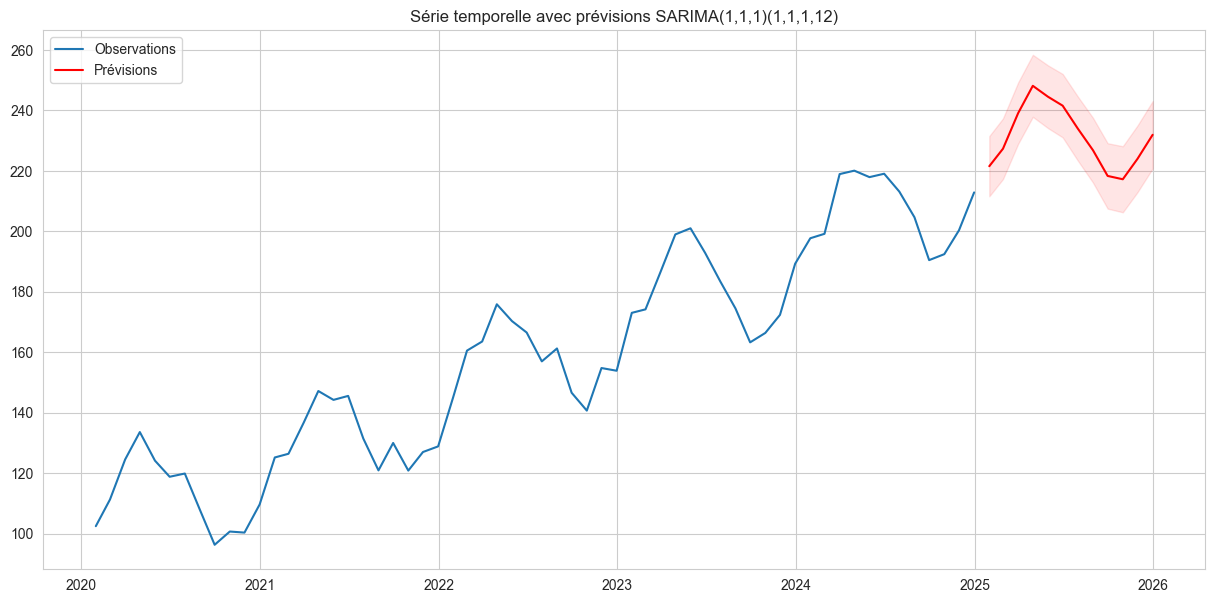


Statistiques des résidus :
count     60.000000
mean       2.299386
std       15.361626
min      -35.703062
25%       -3.097253
50%        0.772628
75%        5.808344
max      102.483571
dtype: float64


In [17]:
# Prévisions et intervalles de confiance
forecast = results.get_forecast(steps=12)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

# Visualisation des résultats
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['valeur'], label='Observations')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='Prévisions')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='r', alpha=.1)
plt.title('Série temporelle avec prévisions SARIMA(1,1,1)(1,1,1,12)')
plt.legend()
plt.grid(True)
plt.show()

# Diagnostic des résidus
residuals = results.resid
print("\nStatistiques des résidus :")
print(residuals.describe())

### 6.4 Modélisation ARMA

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\User

Résultats du modèle ARMA(2,1) :
                               SARIMAX Results                                
Dep. Variable:         valeur_detrend   No. Observations:                   60
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -192.798
Date:                Mon, 27 Oct 2025   AIC                            395.596
Time:                        17:18:06   BIC                            406.067
Sample:                    01-31-2020   HQIC                           399.692
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3391      0.260     -5.154      0.000      -1.848      -0.830
ar.L1          1.6638      0.056     29.577      0.000       1.554       1.774
ar.L2         -0.917

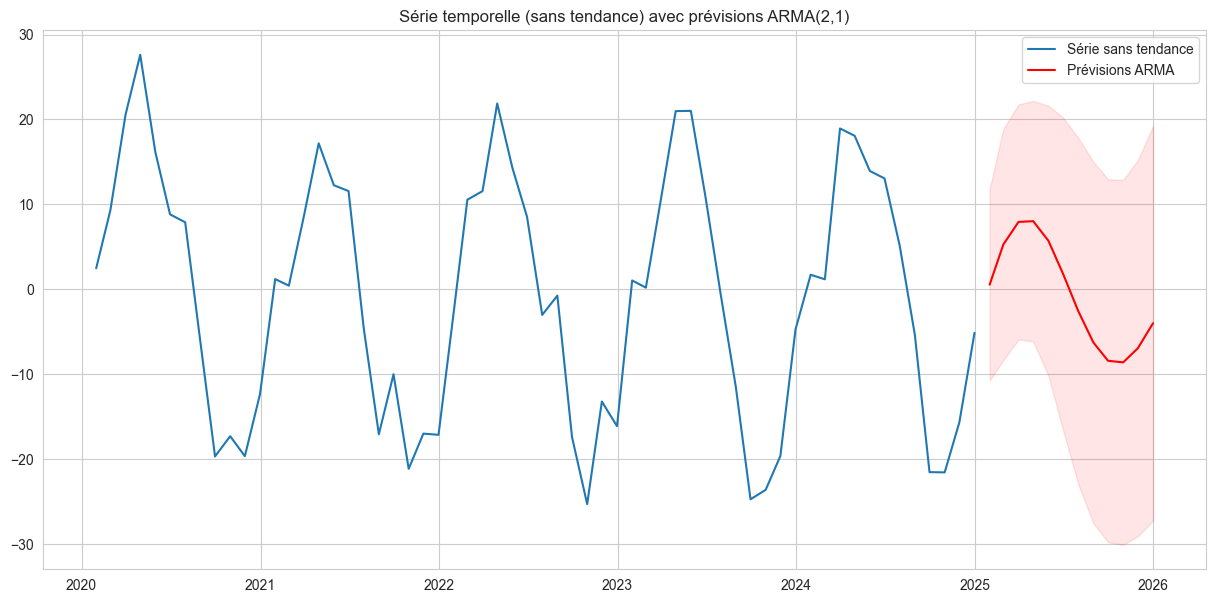


Statistiques des résidus ARMA :
count    60.000000
mean      0.723854
std       6.004690
min     -10.186322
25%      -3.973285
50%       0.679988
75%       5.864362
max      11.985236
dtype: float64


In [20]:
from statsmodels.tsa.arima.model import ARIMA

# On va d'abord enlever la tendance pour appliquer ARMA
df['valeur_detrend'] = df['valeur'] - df['tendance']

# Modèle ARMA(2,1)
model_arma = ARIMA(df['valeur_detrend'], order=(2, 0, 1))
results_arma = model_arma.fit()

# Affichage du résumé
print("Résultats du modèle ARMA(2,1) :")
print(results_arma.summary())

# Prévisions
forecast_arma = results_arma.get_forecast(steps=12)
mean_forecast_arma = forecast_arma.predicted_mean
conf_int_arma = forecast_arma.conf_int()

# Visualisation
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['valeur_detrend'], label='Série sans tendance')
plt.plot(mean_forecast_arma.index, mean_forecast_arma, color='r', label='Prévisions ARMA')
plt.fill_between(conf_int_arma.index,
                 conf_int_arma.iloc[:, 0],
                 conf_int_arma.iloc[:, 1], color='r', alpha=.1)
plt.title('Série temporelle (sans tendance) avec prévisions ARMA(2,1)')
plt.legend()
plt.grid(True)
plt.show()

# Diagnostic des résidus
print("\nStatistiques des résidus ARMA :")
print(results_arma.resid.describe())

### 6.5 Modélisation ARIMA

Résultats du modèle ARIMA(2,1,1) :
                               SARIMAX Results                                
Dep. Variable:                 valeur   No. Observations:                   60
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -213.806
Date:                Mon, 27 Oct 2025   AIC                            435.612
Time:                        17:18:23   BIC                            443.922
Sample:                    01-31-2020   HQIC                           438.856
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2021      0.873      0.232      0.817      -1.508       1.912
ar.L2          0.1667      0.279      0.596      0.551      -0.381       0.714
ma.L1          0.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


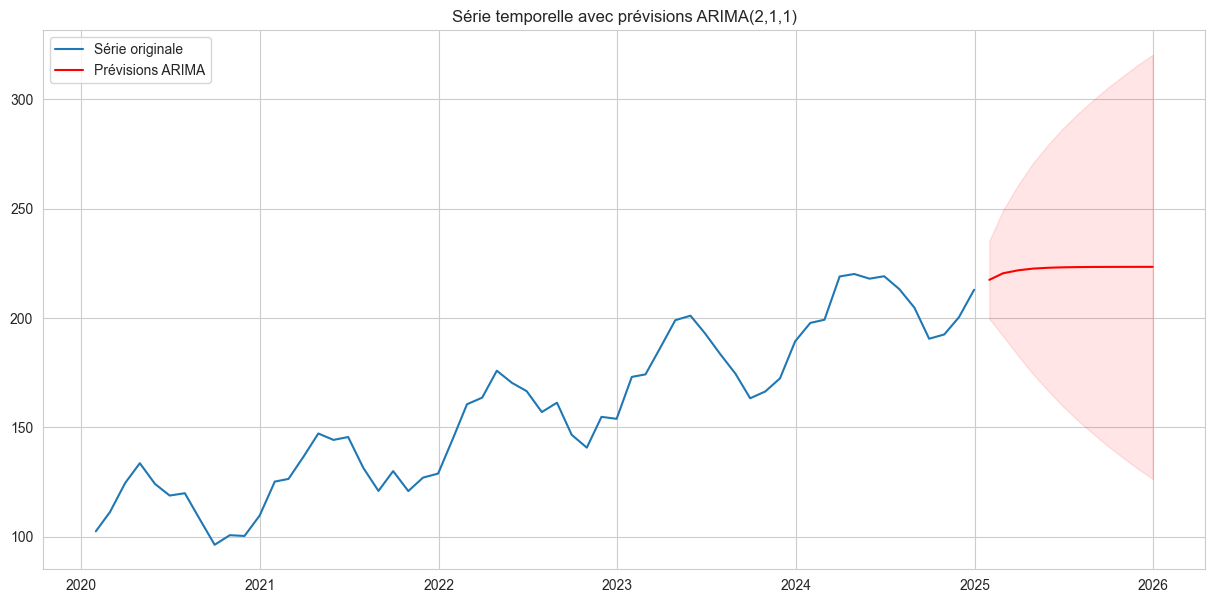


Statistiques des résidus ARIMA :
count     60.000000
mean       2.893703
std       15.866354
min      -14.412679
25%       -6.155678
50%        1.153192
75%        9.045500
max      102.483571
dtype: float64


In [21]:
# Modèle ARIMA(2,1,1) sur la série originale
model_arima = ARIMA(df['valeur'], order=(2, 1, 1))
results_arima = model_arima.fit()

# Affichage du résumé
print("Résultats du modèle ARIMA(2,1,1) :")
print(results_arima.summary())

# Prévisions
forecast_arima = results_arima.get_forecast(steps=12)
mean_forecast_arima = forecast_arima.predicted_mean
conf_int_arima = forecast_arima.conf_int()

# Visualisation
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['valeur'], label='Série originale')
plt.plot(mean_forecast_arima.index, mean_forecast_arima, color='r', label='Prévisions ARIMA')
plt.fill_between(conf_int_arima.index,
                 conf_int_arima.iloc[:, 0],
                 conf_int_arima.iloc[:, 1], color='r', alpha=.1)
plt.title('Série temporelle avec prévisions ARIMA(2,1,1)')
plt.legend()
plt.grid(True)
plt.show()

# Diagnostic des résidus
print("\nStatistiques des résidus ARIMA :")
print(results_arima.resid.describe())

### 6.6 Comparaison des modèles

In [22]:
# Comparaison des critères d'information
models = {
    'ARMA(2,1)': results_arma,
    'ARIMA(2,1,1)': results_arima,
    'SARIMA(1,1,1)(1,1,1,12)': results
}

print("Comparaison des modèles :")
print("\nCritère d'information d'Akaike (AIC) :")
for name, model in models.items():
    print(f"{name}: {model.aic:.2f}")

print("\nCritère d'information bayésien (BIC) :")
for name, model in models.items():
    print(f"{name}: {model.bic:.2f}")

# Comparaison des erreurs quadratiques moyennes
print("\nErreur quadratique moyenne des résidus :")
for name, model in models.items():
    rmse = np.sqrt(np.mean(model.resid**2))
    print(f"{name}: {rmse:.2f}")

Comparaison des modèles :

Critère d'information d'Akaike (AIC) :
ARMA(2,1): 395.60
ARIMA(2,1,1): 435.61
SARIMA(1,1,1)(1,1,1,12): 307.39

Critère d'information bayésien (BIC) :
ARMA(2,1): 406.07
ARIMA(2,1,1): 443.92
SARIMA(1,1,1)(1,1,1,12): 316.64

Erreur quadratique moyenne des résidus :
ARMA(2,1): 6.00
ARIMA(2,1,1): 16.00
SARIMA(1,1,1)(1,1,1,12): 15.41


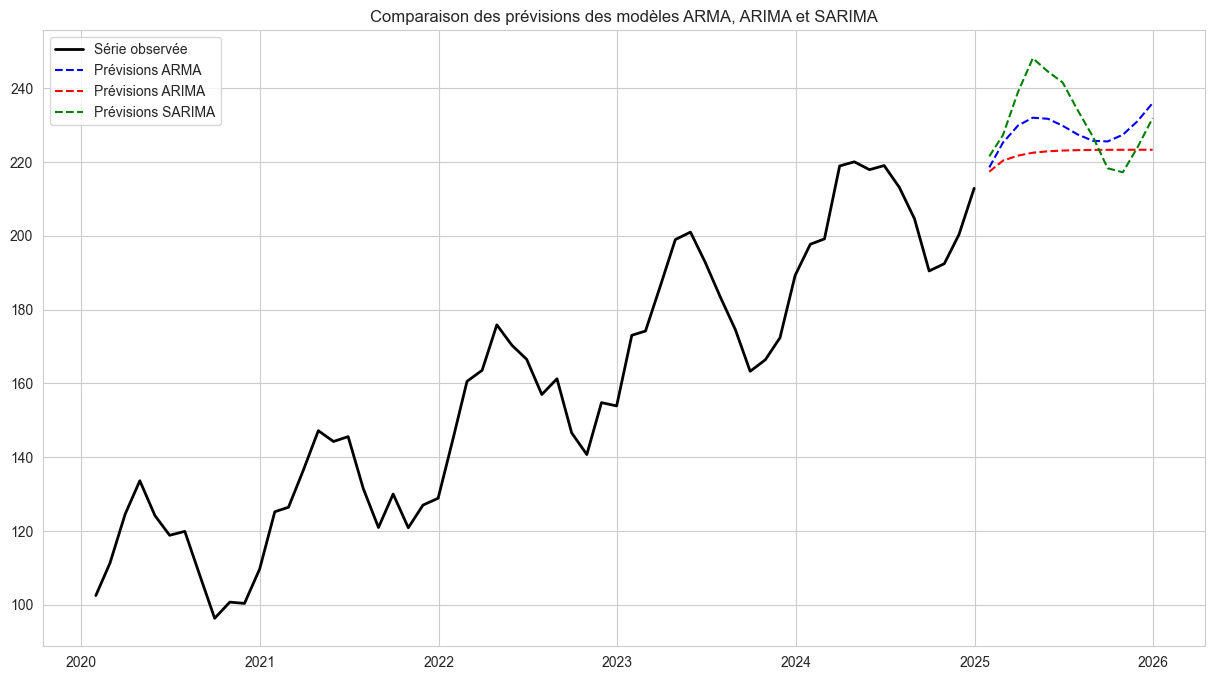

In [23]:
# Visualisation comparative des prévisions des trois modèles
plt.figure(figsize=(15, 8))

# Données observées
plt.plot(df.index, df['valeur'], label='Série observée', color='black', linewidth=2)

# Prévisions ARMA (on ajoute la tendance pour comparer sur la même échelle)
arma_forecast = mean_forecast_arma + df['tendance'].iloc[-1] + slope * np.arange(12)
plt.plot(mean_forecast_arma.index, arma_forecast, '--', label='Prévisions ARMA', color='blue')

# Prévisions ARIMA
plt.plot(mean_forecast_arima.index, mean_forecast_arima, '--', label='Prévisions ARIMA', color='red')

# Prévisions SARIMA
plt.plot(mean_forecast.index, mean_forecast, '--', label='Prévisions SARIMA', color='green')

plt.title('Comparaison des prévisions des modèles ARMA, ARIMA et SARIMA')
plt.legend()
plt.grid(True)
plt.show()

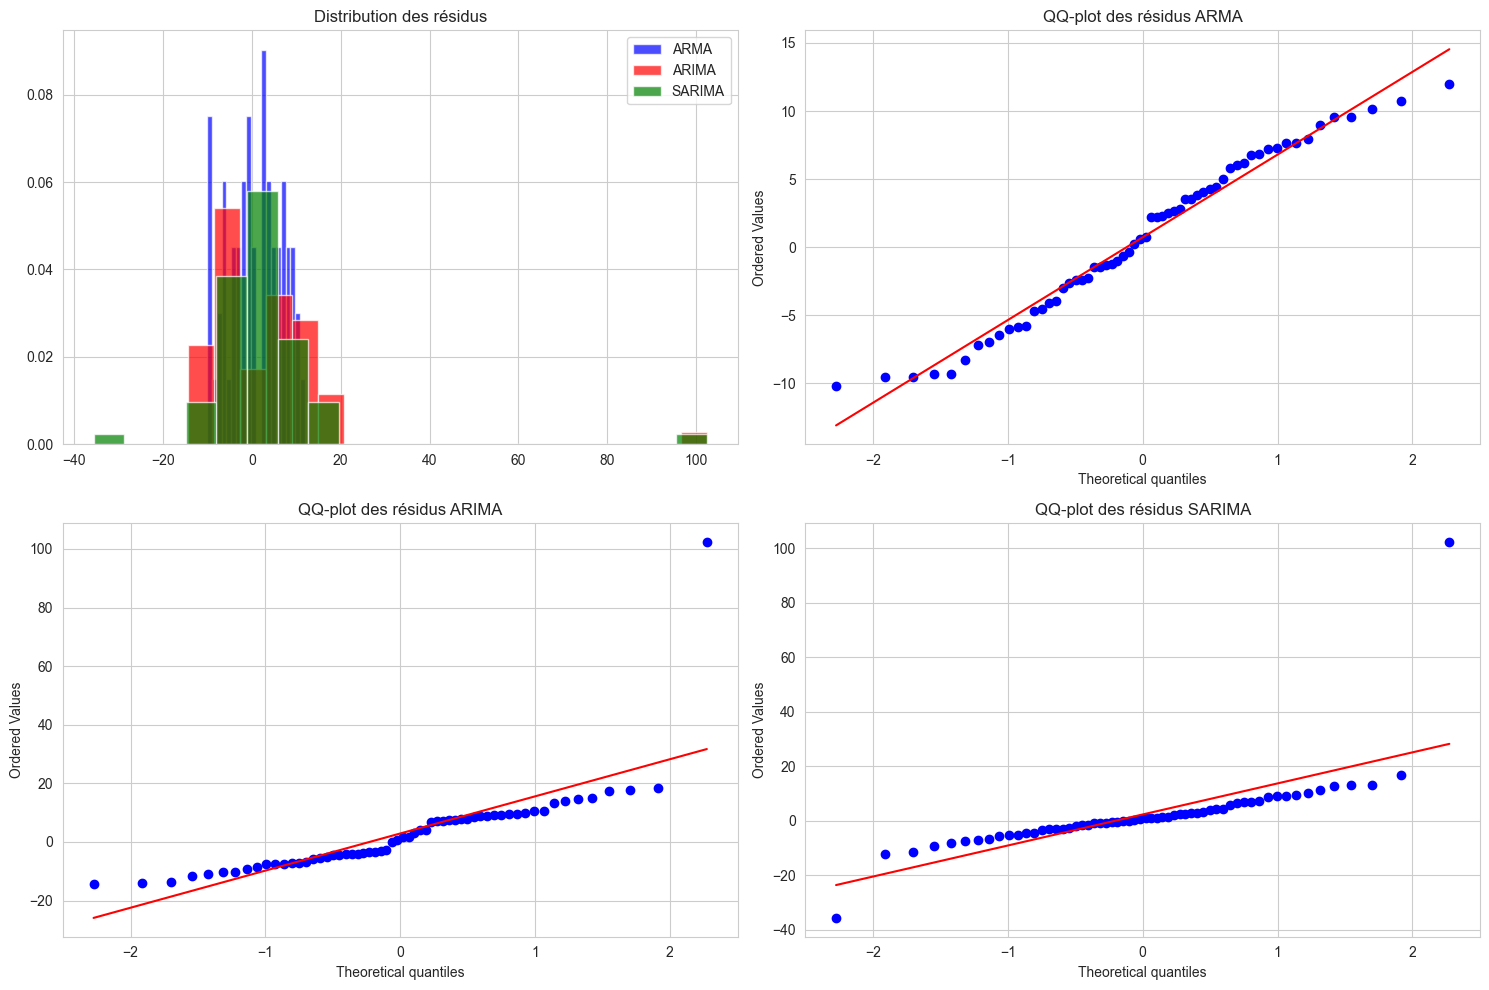

In [24]:
# Comparaison des résidus
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15, 10))

# Distribution des résidus
ax1[0].hist(results_arma.resid, bins=20, density=True, alpha=0.7, color='blue', label='ARMA')
ax1[0].hist(results_arima.resid, bins=20, density=True, alpha=0.7, color='red', label='ARIMA')
ax1[0].hist(results.resid, bins=20, density=True, alpha=0.7, color='green', label='SARIMA')
ax1[0].set_title('Distribution des résidus')
ax1[0].legend()
ax1[0].grid(True)

# QQ-plot des résidus
from scipy import stats
stats.probplot(results_arma.resid, plot=ax1[1])
ax1[1].set_title('QQ-plot des résidus ARMA')

stats.probplot(results_arima.resid, plot=ax2[0])
ax2[0].set_title('QQ-plot des résidus ARIMA')

stats.probplot(results.resid, plot=ax2[1])
ax2[1].set_title('QQ-plot des résidus SARIMA')

plt.tight_layout()
plt.show()

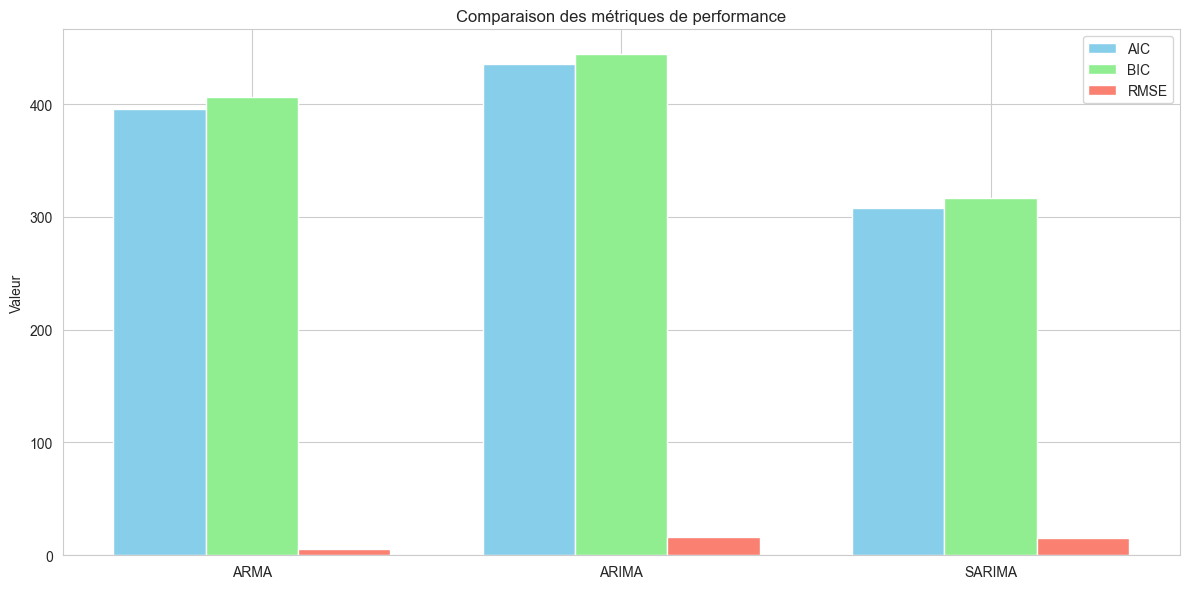

In [25]:
# Visualisation des critères de performance
metrics = {
    'AIC': [results_arma.aic, results_arima.aic, results.aic],
    'BIC': [results_arma.bic, results_arima.bic, results.bic],
    'RMSE': [
        np.sqrt(np.mean(results_arma.resid**2)),
        np.sqrt(np.mean(results_arima.resid**2)),
        np.sqrt(np.mean(results.resid**2))
    ]
}

model_names = ['ARMA', 'ARIMA', 'SARIMA']
x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, metrics['AIC'], width, label='AIC', color='skyblue')
ax.bar(x, metrics['BIC'], width, label='BIC', color='lightgreen')
ax.bar(x + width, metrics['RMSE'], width, label='RMSE', color='salmon')

ax.set_ylabel('Valeur')
ax.set_title('Comparaison des métriques de performance')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.tight_layout()
plt.show()

### 6.7 Modèle Autorégressif (AR)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python

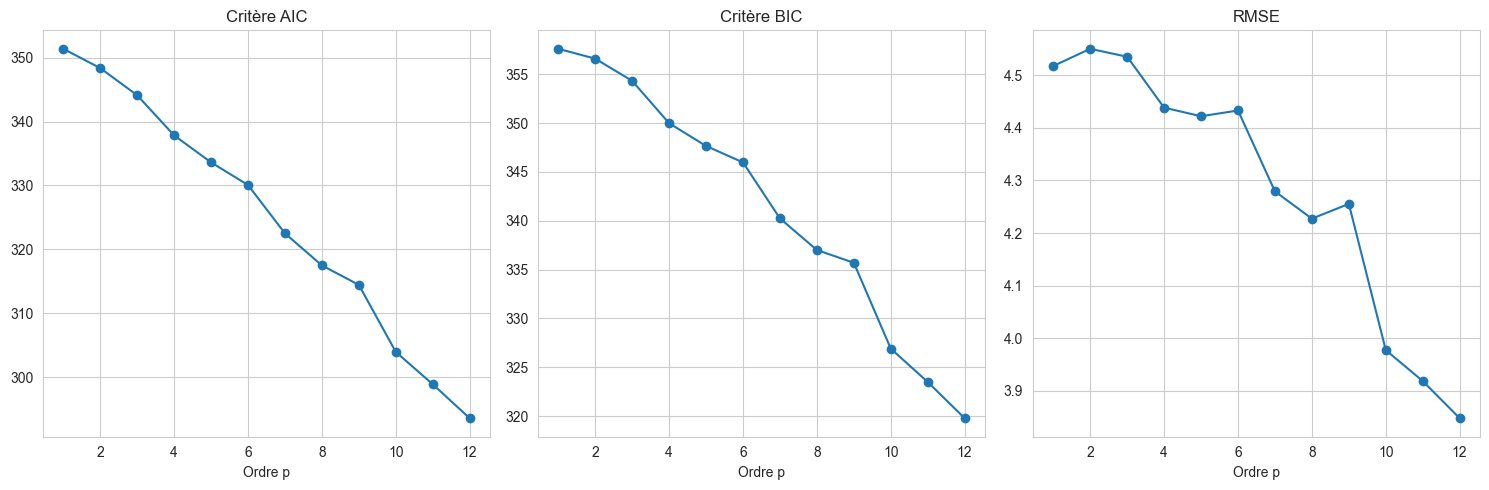


Meilleur ordre selon AIC : 12


In [28]:
# Test de différents ordres pour le modèle AR
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# On va d'abord stationnariser la série en enlevant la tendance et la saisonnalité
serie_stationnaire = df['valeur'] - df['tendance'] - df['saisonnalite']

# Test des différents ordres
max_order = 12
aic_scores = []
bic_scores = []
rmse_scores = []

for p in range(1, max_order + 1):
    model_ar = AutoReg(serie_stationnaire, lags=p)
    results_ar = model_ar.fit()
    
    aic_scores.append(results_ar.aic)
    bic_scores.append(results_ar.bic)
    rmse_scores.append(np.sqrt(mean_squared_error(serie_stationnaire[p:], results_ar.fittedvalues)))

# Visualisation des critères de sélection d'ordre
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, max_order + 1), aic_scores, marker='o')
plt.title('Critère AIC')
plt.xlabel('Ordre p')
plt.grid(True)

plt.subplot(132)
plt.plot(range(1, max_order + 1), bic_scores, marker='o')
plt.title('Critère BIC')
plt.xlabel('Ordre p')
plt.grid(True)

plt.subplot(133)
plt.plot(range(1, max_order + 1), rmse_scores, marker='o')
plt.title('RMSE')
plt.xlabel('Ordre p')
plt.grid(True)

plt.tight_layout()
plt.show()

# Sélection du meilleur ordre selon AIC
best_order = np.argmin(aic_scores) + 1
print(f"\nMeilleur ordre selon AIC : {best_order}")


Résultats du meilleur modèle AR :
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   60
Model:                    AutoReg(12)   Log Likelihood                -132.793
Method:               Conditional MLE   S.D. of innovations              3.848
Date:                Mon, 27 Oct 2025   AIC                            293.587
Time:                        17:23:56   BIC                            319.784
Sample:                    01-31-2021   HQIC                           303.487
                         - 12-31-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3813      0.955     -2.493      0.013      -4.254      -0.509
y.L1           0.1558      0.142      1.096      0.273      -0.123       0.434
y.L2          -0.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32864\2827970943.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=n_forecast+1, freq='M')[1:],


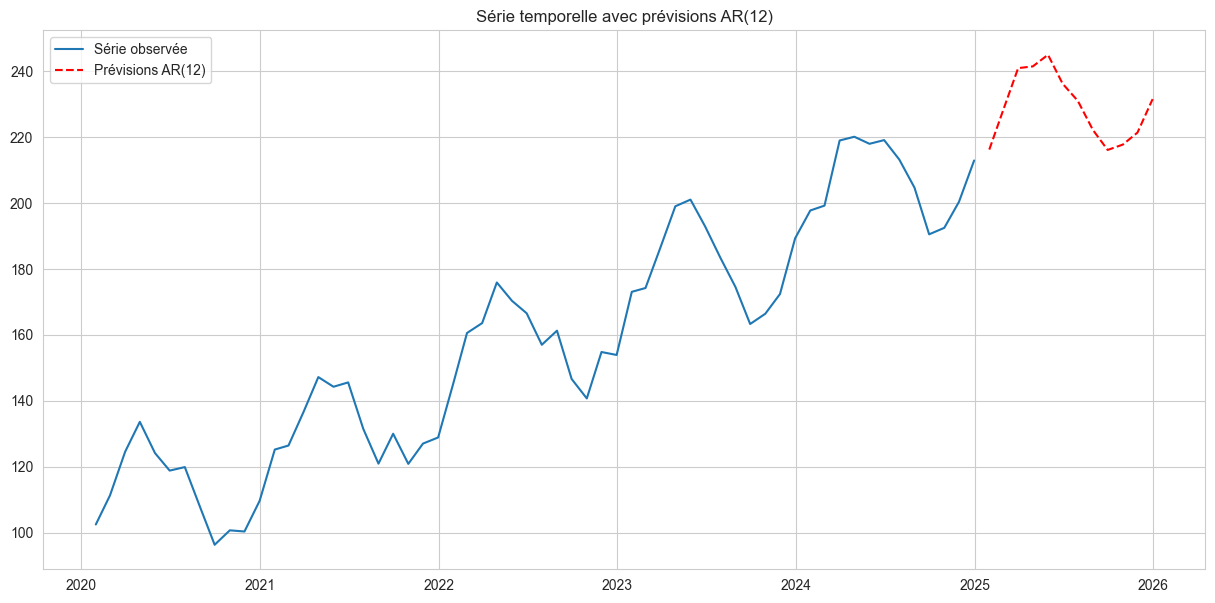


Statistiques des résidus AR :
count    4.800000e+01
mean     1.434038e-15
std      3.888861e+00
min     -8.992085e+00
25%     -2.722068e+00
50%     -1.157859e-01
75%      2.719151e+00
max      8.849646e+00
dtype: float64


In [30]:
# Ajustement du meilleur modèle AR
model_ar_best = AutoReg(serie_stationnaire, lags=best_order)
results_ar_best = model_ar_best.fit()

# Affichage du résumé
print("\nRésultats du meilleur modèle AR :")
print(results_ar_best.summary())

# Prévisions
n_forecast = 12
forecast_ar = results_ar_best.forecast(steps=n_forecast)

# Ajout de la tendance et de la saisonnalité aux prévisions
last_trend = df['tendance'].iloc[-1]
trend_forecast = last_trend + slope * np.arange(1, n_forecast + 1)
t_forecast = np.arange(N, N + n_forecast)
seasonal_forecast = amplitude * np.sin(2 * np.pi * t_forecast / period)

forecast_complete = forecast_ar + trend_forecast + seasonal_forecast

# Visualisation
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['valeur'], label='Série observée')
plt.plot(pd.date_range(start=df.index[-1], periods=n_forecast+1, freq='M')[1:],
         forecast_complete, '--', label=f'Prévisions AR({best_order})', color='red')
plt.title(f'Série temporelle avec prévisions AR({best_order})')
plt.legend()
plt.grid(True)
plt.show()

# Diagnostic des résidus
print("\nStatistiques des résidus AR :")
print(results_ar_best.resid.describe())


Comparaison avec le modèle AR inclus :

Critère d'information d'Akaike (AIC) :
ARMA(2,1): 395.60
ARIMA(2,1,1): 435.61
SARIMA(1,1,1)(1,1,1,12): 307.39
AR: 293.59

Critère d'information bayésien (BIC) :
ARMA(2,1): 406.07
ARIMA(2,1,1): 443.92
SARIMA(1,1,1)(1,1,1,12): 316.64
AR: 319.78

Erreur quadratique moyenne des résidus :
ARMA(2,1): 6.00
ARIMA(2,1,1): 16.00
SARIMA(1,1,1)(1,1,1,12): 15.41
AR: 3.85


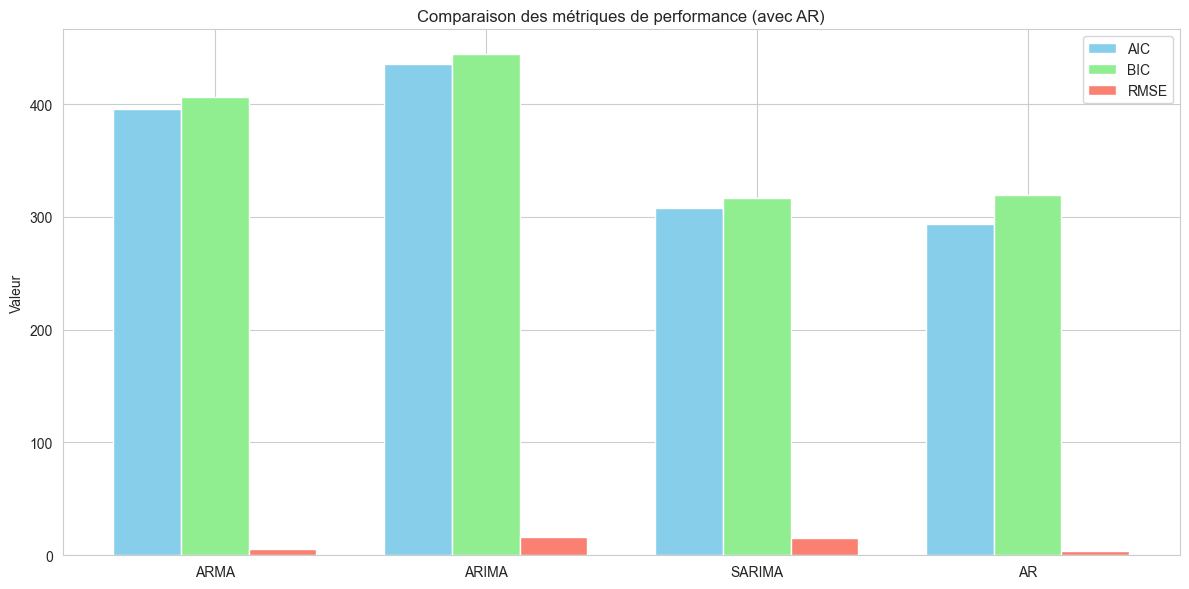

In [31]:
# Mise à jour de la comparaison des modèles avec AR
models['AR'] = results_ar_best

print("\nComparaison avec le modèle AR inclus :")
print("\nCritère d'information d'Akaike (AIC) :")
for name, model in models.items():
    print(f"{name}: {model.aic:.2f}")

print("\nCritère d'information bayésien (BIC) :")
for name, model in models.items():
    print(f"{name}: {model.bic:.2f}")

print("\nErreur quadratique moyenne des résidus :")
for name, model in models.items():
    rmse = np.sqrt(np.mean(model.resid**2))
    print(f"{name}: {rmse:.2f}")

# Mise à jour du graphique de comparaison des métriques
metrics = {
    'AIC': [results_arma.aic, results_arima.aic, results.aic, results_ar_best.aic],
    'BIC': [results_arma.bic, results_arima.bic, results.bic, results_ar_best.bic],
    'RMSE': [
        np.sqrt(np.mean(results_arma.resid**2)),
        np.sqrt(np.mean(results_arima.resid**2)),
        np.sqrt(np.mean(results.resid**2)),
        np.sqrt(np.mean(results_ar_best.resid**2))
    ]
}

model_names = ['ARMA', 'ARIMA', 'SARIMA', 'AR']
x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, metrics['AIC'], width, label='AIC', color='skyblue')
ax.bar(x, metrics['BIC'], width, label='BIC', color='lightgreen')
ax.bar(x + width, metrics['RMSE'], width, label='RMSE', color='salmon')

ax.set_ylabel('Valeur')
ax.set_title('Comparaison des métriques de performance (avec AR)')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.tight_layout()
plt.show()